In [131]:
# Ìå®ÌÇ§ÏßÄ ÏûÑÌè¨Ìä∏
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import konlpy
from konlpy.tag import Okt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [132]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ 
df = pd.read_csv('./ÌôçÎåÄ_ÎßõÏßë_Î¶¨Î∑∞_Îç∞Ïù¥ÌÑ∞2.csv')

In [133]:
df.head(10)

Unnamed: 0 name  average_rating    user  user_rating  \
0           0  ÌõÑÍ≥ÑÎèô             4.5     ÌíÄÎÇ¥Ïùå          5.0   
1           1  ÌõÑÍ≥ÑÎèô             4.5      „Öá„Öá          5.0   
2           2  ÌõÑÍ≥ÑÎèô             4.5      ÌïëÍµ¨          5.0   
3           3  ÌõÑÍ≥ÑÎèô             4.5      :·¥Ö          3.0   
4           4  ÌõÑÍ≥ÑÎèô             4.5     Vin          5.0   
5           5  ÌõÑÍ≥ÑÎèô             4.5     ÏÜêÎØºÏòÅ          5.0   
6           6  ÌõÑÍ≥ÑÎèô             4.5  Ïû•ÏäêÎû≠Í∞ÄÏù¥Îìú          1.0   
7           7  ÌõÑÍ≥ÑÎèô             4.5     Ïù¥Ïö∞ÏßÑ          5.0   
8           8  ÌõÑÍ≥ÑÎèô             4.5     Ï†ïÏ∞∞Î≥ë          4.0   
9           9  ÌõÑÍ≥ÑÎèô             4.5     Ïø†ÏßëÏÇ¨          5.0   

                                             comment  \
0                                                NaN   
1                                         ‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è   
2                                           Ïò§Îûò Ìï¥Ï£ºÏÑ∏Ïöîüôè   
3  Ïõ®Ïù¥ÌåÖÌï¥ÏÑú Î®πÏùÑ ÎßõÏùÄ ÏïÑÎãàÏóêÏöî‚Ä¶ Îã≠Î≥¥ÏåàÏùÄ Î≥¥ÌÜµÏù¥ÏóàÍ≥† ÎπÑÎπîÍµ≠ÏàòÎùºÍ≥† Ìï¥ÏÑú ÎãπÏó∞Ìûà Íµ≠Î¨º ...   
4       ÏôÄ Ïó¨Í∏∏ Ïôú Ïù¥Ï†úÏïåÏïòÏ£†! ÎÑàÎ¨¥ÎßõÏûàÍ≥† Î∞òÏ∞¨ ÌïòÎÇòÌïòÎÇò Îã§ ÎßõÏûàÎÑ§Ïöî!! ÏûêÏ£º Í∞àÍ≤åÏöî!   
5  Ïò§ÎäòÏùò Î©îÎâ¥ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî. Ïñ¥Ï©ú Í∞ñÍ∞ÄÏßÄ Îã≠ÏöîÎ¶¨Î•º Í∑∏Î†áÍ≤å ÏûòÌïòÏãúÏ£†?!! Ïù¥Îü∞ Î¶¨Î∑∞ Ïûò...   
6                                  Ïó¨Í∏∞ÏÑú Î∞•Î®πÍ≥† ÎëòÎã§ Ïû•ÏóºÍ±∏Î¶º;;   
7  ÏµúÏï† ÏãùÎãπÏßÑÏßú Îã§ ÎßõÏûàÍ≥† Í∞ÄÍ≤©Ïù¥ ÏóÑÏ≤≠ Ï∞©Ìï®Ïò§ÎäòÏùò Î©îÎâ¥ÎùºÍ≥† Îß§Ïùº ÏÉàÎ°úÏö¥ Î©îÎâ¥Í∞Ä Ï§ÄÎπÑÎêò...   
8  Îã§ÏùåÎ∂ÄÌÑ∞ ÏÇ¨Ïû•Îãò ÍπÄÏπòÎ≥∂ÏùåÎ∞•ÌïòÏßÄÎßàÏÑ∏Ïöî. „Ö† „Öú ÎùºÎ©¥Îßå ÌïòÏÑ∏Ïöî!ÌïòÏã§Í∫ºÎ©¥ ÏßÑÏßú Îî¥Í±∞ÎßêÍ≥† ...   
9                           Ïù¥Î†áÍ≤å ÎßõÏûàÏñ¥ÎèÑ ÎêòÎÇò Ìï† Ï†ïÎèÑÎ°ú ÎßõÏûàÏñ¥Ïöî„Öé„Öé   

                                      url  target  
0  https://place.map.kakao.com/1183957472       1  
1  https://place.map.kakao.com/1183957472       1  
2  https://place.map.kakao.com/1183957472       1  
3  https://place.map.kakao.com/1183957472       0  
4  https://place.map.kakao.com/1183957472       1  
5  https://place.map.kakao.com/1183957472       1  
6  https://place.map.kakao.com/1183957472       0  
7  https://place.map.kakao.com/1183957472       1  
8  https://place.map.kakao.com/1183957472       1  
9  https://place.map.kakao.com/1183957472       1

In [134]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1232 non-null   int64  
 1   name            1232 non-null   object 
 2   average_rating  1232 non-null   float64
 3   user            1231 non-null   object 
 4   user_rating     1232 non-null   float64
 5   comment         960 non-null    object 
 6   url             1232 non-null   object 
 7   target          1232 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 77.1+ KB


In [135]:
df.duplicated(['comment'])

0       False
1       False
2       False
3       False
4       False
        ...  
1227    False
1228     True
1229    False
1230    False
1231    False
Length: 1232, dtype: bool

In [136]:
df.drop_duplicates(['comment'])

Unnamed: 0  name  average_rating    user  user_rating  \
0              0   ÌõÑÍ≥ÑÎèô             4.5     ÌíÄÎÇ¥Ïùå          5.0   
1              1   ÌõÑÍ≥ÑÎèô             4.5      „Öá„Öá          5.0   
2              2   ÌõÑÍ≥ÑÎèô             4.5      ÌïëÍµ¨          5.0   
3              3   ÌõÑÍ≥ÑÎèô             4.5      :·¥Ö          3.0   
4              4   ÌõÑÍ≥ÑÎèô             4.5     Vin          5.0   
...          ...   ...             ...     ...          ...   
1226        1226  Î∞úÎ∞îÎ¶¨ÎÑ§             4.6  Î¶¨Î∑∞Ï†ÄÏäπÏÇ¨Ïûê          5.0   
1227        1227  Î∞úÎ∞îÎ¶¨ÎÑ§             4.6      Í∑∏Ïπò          5.0   
1229        1229  Î∞úÎ∞îÎ¶¨ÎÑ§             4.6     ÍπÄÌÉúÏõÖ          5.0   
1230        1230  Î∞úÎ∞îÎ¶¨ÎÑ§             4.6     „Öá„ÖÖ„Öá          4.0   
1231        1231  Î∞úÎ∞îÎ¶¨ÎÑ§             4.6       „Ö£          5.0   

                                                comment  \
0                                                   NaN   
1                                            ‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è   
2                                              Ïò§Îûò Ìï¥Ï£ºÏÑ∏Ïöîüôè   
3     Ïõ®Ïù¥ÌåÖÌï¥ÏÑú Î®πÏùÑ ÎßõÏùÄ ÏïÑÎãàÏóêÏöî‚Ä¶ Îã≠Î≥¥ÏåàÏùÄ Î≥¥ÌÜµÏù¥ÏóàÍ≥† ÎπÑÎπîÍµ≠ÏàòÎùºÍ≥† Ìï¥ÏÑú ÎãπÏó∞Ìûà Íµ≠Î¨º ...   
4          ÏôÄ Ïó¨Í∏∏ Ïôú Ïù¥Ï†úÏïåÏïòÏ£†! ÎÑàÎ¨¥ÎßõÏûàÍ≥† Î∞òÏ∞¨ ÌïòÎÇòÌïòÎÇò Îã§ ÎßõÏûàÎÑ§Ïöî!! ÏûêÏ£º Í∞àÍ≤åÏöî!   
...                                                 ...   
1226  6-7Ï≤úÏõêÏù¥Î©¥ Îß§ÏùºÎß§Ïùº Îã§Î•¥Í≤å ÎÇòÏò§Îäî Îî∞ÎúªÌïú Ï∞åÍ∞úÎì§, Î∞òÏ∞¨Îì§, Í∑∏Î¶¨Í≥† Î©îÏù∏ Î∞òÏ∞¨ÏóêÏÑú...   
1227  Î∞•Î®πÏùÑÎïåÎßàÎã§ ÌñâÎ≥µÌï©ÎãàÎã§. Ïñ¥Îäê Î∞òÏ∞¨ÎèÑ ÌóàÌà¨Î£®Í∞Ä ÏóÜÏñ¥Ïöî. 6000ÏõêÏßúÎ¶¨ Ï†úÏú°Î≥∂Ïùå ÏÉÅÏûÖ...   
1229               Ïù¥Í∞ÄÍ≤©Ïóê Ï∞åÍ∞úÎûë Ï†úÏú°Ïù¥ ÎÇòÏò§Í≥† Î∞•ÎèÑ ÎçîÏ£ºÏãúÎäîÎç∞ Î≠îÎßêÏù¥ Îçî ÌïÑÏöîÌï†Íπå   
1230                                               Í∞ÄÏÑ±ÎπÑÏß±   
1231                                    Ï†úÏú°Ï†ïÏãù ÏßÑÏã¨ ÏµúÍ≥†ÏòàÏöî!!!   

                                         url  target  
0     https://place.map.kakao.com/1183957472       1  
1     https://place.map.kakao.com/1183957472       1  
2     https://place.map.kakao.com/1183957472       1  
3     https://place.map.kakao.com/1183957472       0  
4     https://place.map.kakao.com/1183957472       1  
...                                      ...     ...  
1226    https://place.map.kakao.com/15625653       1  
1227    https://place.map.kakao.com/15625653       1  
1229    https://place.map.kakao.com/15625653       1  
1230    https://place.map.kakao.com/15625653       1  
1231    https://place.map.kakao.com/15625653       1  

[940 rows x 8 columns]

<AxesSubplot:>

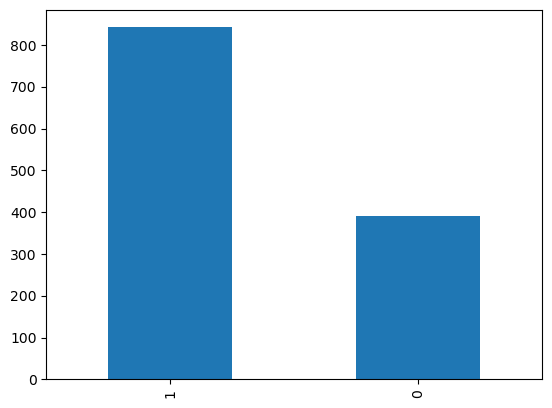

In [137]:
df['target'].value_counts().plot(kind = 'bar')

## Í≤∞Ï∏°Ïπò ÌôïÏù∏ Î∞è Ï†úÍ±∞

In [138]:
df.isnull().sum()

Unnamed: 0          0
name                0
average_rating      0
user                1
user_rating         0
comment           272
url                 0
target              0
dtype: int64

In [139]:
df = df.dropna()
df.isnull().sum()

Unnamed: 0        0
name              0
average_rating    0
user              0
user_rating       0
comment           0
url               0
target            0
dtype: int64

## Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú

In [140]:
df['comment'] = df['comment'].str.replace("[^„Ñ±-Ìïò-„Ö£Í∞Ä-Ìû£ ]", '')

df.head(10)

/var/folders/m3/9rlp04l902592zqcywkn5ppm0000gn/T/ipykernel_41263/736958544.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment'] = df['comment'].str.replace("[^„Ñ±-Ìïò-„Ö£Í∞Ä-Ìû£ ]", '')


Unnamed: 0 name  average_rating        user  user_rating  \
1            1  ÌõÑÍ≥ÑÎèô             4.5          „Öá„Öá          5.0   
2            2  ÌõÑÍ≥ÑÎèô             4.5          ÌïëÍµ¨          5.0   
3            3  ÌõÑÍ≥ÑÎèô             4.5          :·¥Ö          3.0   
4            4  ÌõÑÍ≥ÑÎèô             4.5         Vin          5.0   
5            5  ÌõÑÍ≥ÑÎèô             4.5         ÏÜêÎØºÏòÅ          5.0   
6            6  ÌõÑÍ≥ÑÎèô             4.5      Ïû•ÏäêÎû≠Í∞ÄÏù¥Îìú          1.0   
7            7  ÌõÑÍ≥ÑÎèô             4.5         Ïù¥Ïö∞ÏßÑ          5.0   
8            8  ÌõÑÍ≥ÑÎèô             4.5         Ï†ïÏ∞∞Î≥ë          4.0   
9            9  ÌõÑÍ≥ÑÎèô             4.5         Ïø†ÏßëÏÇ¨          5.0   
10          10  ÌõÑÍ≥ÑÎèô             4.5  Sungjin Ji          5.0   

                                              comment  \
1                                                       
2                                             Ïò§Îûò Ìï¥Ï£ºÏÑ∏Ïöî   
3   Ïõ®Ïù¥ÌåÖÌï¥ÏÑú Î®πÏùÑ ÎßõÏùÄ ÏïÑÎãàÏóêÏöî Îã≠Î≥¥ÏåàÏùÄ Î≥¥ÌÜµÏù¥ÏóàÍ≥† ÎπÑÎπîÍµ≠ÏàòÎùºÍ≥† Ìï¥ÏÑú ÎãπÏó∞Ìûà Íµ≠Î¨º ÏóÜ...   
4            ÏôÄ Ïó¨Í∏∏ Ïôú Ïù¥Ï†úÏïåÏïòÏ£† ÎÑàÎ¨¥ÎßõÏûàÍ≥† Î∞òÏ∞¨ ÌïòÎÇòÌïòÎÇò Îã§ ÎßõÏûàÎÑ§Ïöî ÏûêÏ£º Í∞àÍ≤åÏöî   
5   Ïò§ÎäòÏùò Î©îÎâ¥ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Ïñ¥Ï©ú Í∞ñÍ∞ÄÏßÄ Îã≠ÏöîÎ¶¨Î•º Í∑∏Î†áÍ≤å ÏûòÌïòÏãúÏ£† Ïù¥Îü∞ Î¶¨Î∑∞ Ïûò Ïïà ÎÇ®...   
6                                     Ïó¨Í∏∞ÏÑú Î∞•Î®πÍ≥† ÎëòÎã§ Ïû•ÏóºÍ±∏Î¶º   
7   ÏµúÏï† ÏãùÎãπÏßÑÏßú Îã§ ÎßõÏûàÍ≥† Í∞ÄÍ≤©Ïù¥ ÏóÑÏ≤≠ Ï∞©Ìï®Ïò§ÎäòÏùò Î©îÎâ¥ÎùºÍ≥† Îß§Ïùº ÏÉàÎ°úÏö¥ Î©îÎâ¥Í∞Ä Ï§ÄÎπÑÎêò...   
8   Îã§ÏùåÎ∂ÄÌÑ∞ ÏÇ¨Ïû•Îãò ÍπÄÏπòÎ≥∂ÏùåÎ∞•ÌïòÏßÄÎßàÏÑ∏Ïöî „Ö† „Öú ÎùºÎ©¥Îßå ÌïòÏÑ∏ÏöîÌïòÏã§Í∫ºÎ©¥ ÏßÑÏßú Îî¥Í±∞ÎßêÍ≥† ÍπÄÏπò...   
9                            Ïù¥Î†áÍ≤å ÎßõÏûàÏñ¥ÎèÑ ÎêòÎÇò Ìï† Ï†ïÎèÑÎ°ú ÎßõÏûàÏñ¥Ïöî„Öé„Öé   
10  Ïò§ÎäòÏùò Î©îÎâ¥Îã≠ Ïπ¥Î†àÎùºÏù¥Ïä§ÎØ∏Îãà Ïñ¥Î¨µ Ïö∞ÎèôÎëò Îã§ ÎßõÏûàÎã§ Ïπ¥Î†àÎäî ÏùºÎ≥∏Ïãù ÏïÑÎãàÍ≥† Ïö∞Î¶¨Ïãù Ïö∞...   

                                       url  target  
1   https://place.map.kakao.com/1183957472       1  
2   https://place.map.kakao.com/1183957472       1  
3   https://place.map.kakao.com/1183957472       0  
4   https://place.map.kakao.com/1183957472       1  
5   https://place.map.kakao.com/1183957472       1  
6   https://place.map.kakao.com/1183957472       0  
7   https://place.map.kakao.com/1183957472       1  
8   https://place.map.kakao.com/1183957472       1  
9   https://place.map.kakao.com/1183957472       1  
10  https://place.map.kakao.com/1183957472       1

In [141]:
df['comment'] = df['comment'].replace('', np.nan)
len(df)

959

In [142]:
df.isnull().sum()

Unnamed: 0        0
name              0
average_rating    0
user              0
user_rating       0
comment           3
url               0
target            0
dtype: int64

In [143]:
 # Ï†ïÍ∑úÌëúÌòÑÏãùÏúºÎ°ú Ïù∏Ìï¥ Í≥µÎ∞±Ïù¥ Îêú Î¶¨Î∑∞ Ìñâ Ï†úÍ±∞
df = df.dropna()
len(df)

956

In [144]:
df.head(10)

Unnamed: 0 name  average_rating        user  user_rating  \
2            2  ÌõÑÍ≥ÑÎèô             4.5          ÌïëÍµ¨          5.0   
3            3  ÌõÑÍ≥ÑÎèô             4.5          :·¥Ö          3.0   
4            4  ÌõÑÍ≥ÑÎèô             4.5         Vin          5.0   
5            5  ÌõÑÍ≥ÑÎèô             4.5         ÏÜêÎØºÏòÅ          5.0   
6            6  ÌõÑÍ≥ÑÎèô             4.5      Ïû•ÏäêÎû≠Í∞ÄÏù¥Îìú          1.0   
7            7  ÌõÑÍ≥ÑÎèô             4.5         Ïù¥Ïö∞ÏßÑ          5.0   
8            8  ÌõÑÍ≥ÑÎèô             4.5         Ï†ïÏ∞∞Î≥ë          4.0   
9            9  ÌõÑÍ≥ÑÎèô             4.5         Ïø†ÏßëÏÇ¨          5.0   
10          10  ÌõÑÍ≥ÑÎèô             4.5  Sungjin Ji          5.0   
11          11  ÌõÑÍ≥ÑÎèô             4.5          ÏÜêÏÜê          5.0   

                                              comment  \
2                                             Ïò§Îûò Ìï¥Ï£ºÏÑ∏Ïöî   
3   Ïõ®Ïù¥ÌåÖÌï¥ÏÑú Î®πÏùÑ ÎßõÏùÄ ÏïÑÎãàÏóêÏöî Îã≠Î≥¥ÏåàÏùÄ Î≥¥ÌÜµÏù¥ÏóàÍ≥† ÎπÑÎπîÍµ≠ÏàòÎùºÍ≥† Ìï¥ÏÑú ÎãπÏó∞Ìûà Íµ≠Î¨º ÏóÜ...   
4            ÏôÄ Ïó¨Í∏∏ Ïôú Ïù¥Ï†úÏïåÏïòÏ£† ÎÑàÎ¨¥ÎßõÏûàÍ≥† Î∞òÏ∞¨ ÌïòÎÇòÌïòÎÇò Îã§ ÎßõÏûàÎÑ§Ïöî ÏûêÏ£º Í∞àÍ≤åÏöî   
5   Ïò§ÎäòÏùò Î©îÎâ¥ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Ïñ¥Ï©ú Í∞ñÍ∞ÄÏßÄ Îã≠ÏöîÎ¶¨Î•º Í∑∏Î†áÍ≤å ÏûòÌïòÏãúÏ£† Ïù¥Îü∞ Î¶¨Î∑∞ Ïûò Ïïà ÎÇ®...   
6                                     Ïó¨Í∏∞ÏÑú Î∞•Î®πÍ≥† ÎëòÎã§ Ïû•ÏóºÍ±∏Î¶º   
7   ÏµúÏï† ÏãùÎãπÏßÑÏßú Îã§ ÎßõÏûàÍ≥† Í∞ÄÍ≤©Ïù¥ ÏóÑÏ≤≠ Ï∞©Ìï®Ïò§ÎäòÏùò Î©îÎâ¥ÎùºÍ≥† Îß§Ïùº ÏÉàÎ°úÏö¥ Î©îÎâ¥Í∞Ä Ï§ÄÎπÑÎêò...   
8   Îã§ÏùåÎ∂ÄÌÑ∞ ÏÇ¨Ïû•Îãò ÍπÄÏπòÎ≥∂ÏùåÎ∞•ÌïòÏßÄÎßàÏÑ∏Ïöî „Ö† „Öú ÎùºÎ©¥Îßå ÌïòÏÑ∏ÏöîÌïòÏã§Í∫ºÎ©¥ ÏßÑÏßú Îî¥Í±∞ÎßêÍ≥† ÍπÄÏπò...   
9                            Ïù¥Î†áÍ≤å ÎßõÏûàÏñ¥ÎèÑ ÎêòÎÇò Ìï† Ï†ïÎèÑÎ°ú ÎßõÏûàÏñ¥Ïöî„Öé„Öé   
10  Ïò§ÎäòÏùò Î©îÎâ¥Îã≠ Ïπ¥Î†àÎùºÏù¥Ïä§ÎØ∏Îãà Ïñ¥Î¨µ Ïö∞ÎèôÎëò Îã§ ÎßõÏûàÎã§ Ïπ¥Î†àÎäî ÏùºÎ≥∏Ïãù ÏïÑÎãàÍ≥† Ïö∞Î¶¨Ïãù Ïö∞...   
11            Îã≠Î≥¥ÏåàÏù¥ ÌäπÌûà ÏòàÏà† Îß§Ïùº Ìï¥Ï£ºÏãúÎ©¥ Ï¢ãÍ≤†ÎäîÎç∞ Ïò§ÎäòÏùòÎ©îÎâ¥Ïó¨Ïïº ÎßõÎ≥º Ïàò ÏûàÏùå   

                                       url  target  
2   https://place.map.kakao.com/1183957472       1  
3   https://place.map.kakao.com/1183957472       0  
4   https://place.map.kakao.com/1183957472       1  
5   https://place.map.kakao.com/1183957472       1  
6   https://place.map.kakao.com/1183957472       0  
7   https://place.map.kakao.com/1183957472       1  
8   https://place.map.kakao.com/1183957472       1  
9   https://place.map.kakao.com/1183957472       1  
10  https://place.map.kakao.com/1183957472       1  
11  https://place.map.kakao.com/1183957472       1

## ÌÜ†ÌÅ∞Ìôî Î∞è Î∂àÏö©Ïñ¥ Ï†úÍ±∞
* Î∂àÏö©Ïñ¥ ÏÇ¨Ï†Ñ : 'Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§'

In [145]:
stopwords =['Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§']

In [146]:

okt = Okt()

morph_data = []
for sentence in df['comment']:
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True) # ÌÜ†ÌÅ∞Ìôî
  temp_X = [word for word in temp_X if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
  morph_data.append(temp_X)

In [147]:
morph_data[:10]

[['Ïò§Îûò', 'Ìï¥Ï£ºÎã§'],
 ['Ïõ®Ïù¥',
  'ÌåÖ',
  'Î®πÎã§',
  'Îßõ',
  'ÏïÑÎãàÎã§',
  'Îã≠',
  'Î≥¥Ïåà',
  'Î≥¥ÌÜµ',
  'Ïù¥Îã§',
  'ÎπÑÎπîÍµ≠Ïàò',
  'ÎùºÍ≥†',
  'ÎãπÏó∞ÌïòÎã§',
  'Íµ≠Î¨º',
  'ÏóÜÎã§',
  'Ï§Ñ',
  'Ïïå',
  'Í≥†',
  'ÏãúÌÇ§Îã§',
  'Íµ≠Î¨º',
  'ÏûàÎã§',
  'ÎãπÌô©',
  'ÎÑàÎ¨¥',
  'Î∞çÎ∞ç'],
 ['Ïò§Îã§',
  'Ïó¨Í∏∞Îã§',
  'Ïôú',
  'Ïù¥Ï†ú',
  'ÏïåÎã§',
  'ÎÑàÎ¨¥',
  'ÎßõÏûàÎã§',
  'Î∞òÏ∞¨',
  'ÌïòÎÇò',
  'ÌïòÎÇò',
  'Îã§',
  'ÎßõÏûàÎã§',
  'ÏûêÏ£º',
  'Í∞àÎã§'],
 ['Ïò§Îäò',
  'Î©îÎâ¥',
  'ÎÑàÎ¨¥',
  'Ï¢ãÎã§',
  'Ïñ¥Ï©ú',
  'Í∞ñÍ∞ÄÏßÄ',
  'Îã≠',
  'ÏöîÎ¶¨',
  'Í∑∏Î†áÍ≤å',
  'Ïù¥Î†áÎã§',
  'Î¶¨Î∑∞',
  'ÏûêÎã§',
  'Ïïà',
  'ÎÇ®Í∏∞Îã§',
  'ÏÉÅÏàòÏó≠',
  'Í∑ºÏ≤ò',
  'Ï†ú',
  'ÏµúÏï†',
  'ÎßõÏßë',
  'Ïù¥Îã§',
  'ÏÇ¨ÏßÑ',
  'ÌÉúÍµ≠',
  'Ïãù',
  'Î≥∂ÏùåÎ∞•',
  'Ïù¥Îûë',
  'ÏåÄÍµ≠Ïàò',
  'ÎÇòÏò§Îã§',
  'Îïå',
  'ÏòàÏöî'],
 ['Ïó¨Í∏∞', 'ÏÑú', 'Î∞•', 'Î®πÎã§', 'ÎëêÎã§', 'Ïû•Ïóº', 'Í±∏Î¶¨Îã§'],
 ['ÏµúÏï†',
  'ÏãùÎãπ',
  'ÏßÑÏßú',
  'Îã§',
  'ÎßõÏûàÎã§',
  'Í∞ÄÍ≤©',
  'ÏóÑÏ≤≠',
  'Ï∞©ÌïòÎã§'

In [148]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(morph_data)
#tokenizer.word_index
data = tokenizer.texts_to_sequences(morph_data)
data[:10]

[[295, 142],
 [110,
  99,
  2,
  3,
  24,
  323,
  912,
  240,
  11,
  913,
  256,
  630,
  23,
  9,
  163,
  241,
  41,
  82,
  23,
  4,
  553,
  7,
  1153],
 [50, 207, 107, 296, 121, 7, 1, 324, 111, 111, 16, 1, 167, 64],
 [257,
  54,
  7,
  8,
  914,
  1643,
  323,
  297,
  226,
  208,
  227,
  112,
  12,
  472,
  915,
  228,
  113,
  421,
  42,
  11,
  473,
  1644,
  184,
  474,
  158,
  1645,
  17,
  32,
  475],
 [71, 122, 20, 2, 422, 1646, 325],
 [421,
  153,
  21,
  16,
  1,
  39,
  90,
  916,
  257,
  54,
  256,
  554,
  476,
  54,
  745,
  26,
  167,
  1154,
  54,
  1647,
  36,
  1648,
  159,
  17,
  477,
  554,
  1155,
  631,
  326],
 [229,
  148,
  51,
  67,
  1156,
  133,
  178,
  632,
  123,
  31,
  21,
  423,
  746,
  134,
  20,
  31,
  68,
  142,
  747,
  28,
  1,
  14],
 [353, 1, 26, 27, 18, 1, 185],
 [257,
  54,
  323,
  1649,
  478,
  1157,
  124,
  748,
  16,
  1,
  35,
  114,
  184,
  24,
  479,
  184,
  124,
  1157,
  61,
  1650,
  1651,
  96,
  23,
  3,
  114,
  18

In [149]:
# print('Î¶¨Î∑∞ ÏµúÎåÄ Í∏∏Ïù¥ : ', max(len(l) for l in data))
# print('Î¶¨Î∑∞ ÌèâÍ∑† Í∏∏Ïù¥ : ', sum(map(len, data))/len(data))
# plt.hist([len(s) for s in data], bins=50)
# plt.xlabel('length of Data')
# plt.ylabel('number of Data')
# plt.show()

## ÎÇÆÏùÄ ÎπàÎèÑÏàòÏùò Îã®Ïñ¥ Ï†úÍ±∞

In [150]:
# 3Î≤àÎØ∏ÎßåÎäî Ï†úÍ±∞Ìï¥Ï§å
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value

    if value < threshold:
        rare_cnt += 1
        rare_freq = rare_freq + value

print('Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò : ', words_cnt)
print('ÎπàÎèÑÍ∞Ä {} Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥ Ïàò: {}'.format(threshold-1, rare_cnt))
print('Ìù¨Í∑Ä Îã®Ïñ¥ ÎπÑÏú® : {}'.format((rare_cnt / words_cnt)*100))
print('Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑÏú® : {}'.format((rare_freq / words_freq)*100))

Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò :  3224
ÎπàÎèÑÍ∞Ä 2 Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥ Ïàò: 2072
Ìù¨Í∑Ä Îã®Ïñ¥ ÎπÑÏú® : 64.26799007444168
Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑÏú® : 13.216404436419912


In [151]:
vocab_size = words_cnt-rare_cnt + 2
vocab_size

1154

In [152]:
# tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
# tokenizer.fit_on_texts(morph_data)
# data = tokenizer.texts_to_sequences(morph_data)
# data

In [153]:
# drop_data = [index for index, sentence in enumerate(data) if len(sentence) < 1]

# data = np.delete(data, drop_data, axis = 0)
# len(data)

## Ìå®Îî©
* Î™®Îç∏Ïóê ÏûÖÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ÏÑ† Î™®Îì† Îç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥Í∞Ä ÎèôÏùºÌï¥ÏïºÌï®

In [154]:
print('Î¶¨Î∑∞ ÏµúÎåÄ Í∏∏Ïù¥ : ', max(len(l) for l in data))
print('Î¶¨Î∑∞ ÌèâÍ∑† Í∏∏Ïù¥ : ', sum(map(len, data))/len(data))


Î¶¨Î∑∞ ÏµúÎåÄ Í∏∏Ïù¥ :  246
Î¶¨Î∑∞ ÌèâÍ∑† Í∏∏Ïù¥ :  20.277196652719667


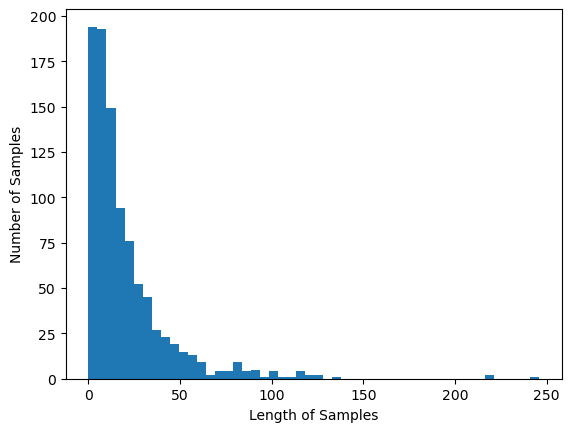

In [155]:
plt.hist([len(s) for s in data], bins =50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

* ÏµúÎåÄ Í∏∏Ïù¥Îäî 120ÏúºÎ°ú ÏÑ†ÌÉù

In [156]:
max_len = 250

In [157]:
# data = pad_sequences(data, maxlen = max_len)
# data.shape

In [158]:
# data[:10]

## ÏõêÌï´ Ïù∏ÏΩîÎî©

In [159]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer

In [160]:
# y = tf.keras.utils.to_categorical(df['target'])
# y[:10]

In [161]:
# df['target'].replace(0, 'bad', inplace = True)
# df['target'].replace(1, 'soso', inplace = True)
# df['target'].replace(2, 'good', inplace = True)

# df
# df['target']

## ÌïôÏäµ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

In [162]:
from sklearn.model_selection import train_test_split

y = df['target']
x_train, x_test, y_train, y_test = train_test_split(data,y,test_size=0.30,random_state=2022)
# print(x_train.shape)
# print(x_test.shape)
y_train[:10]

/var/folders/m3/9rlp04l902592zqcywkn5ppm0000gn/T/ipykernel_41263/2846089119.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train[:10]


355     0
1231    1
824     1
1090    1
243     1
727     0
360     0
231     1
1205    1
182     0
Name: target, dtype: int64

## Î™®Îç∏ÎßÅ Î∞è ÌïôÏäµ
* LSTM ÏÇ¨Ïö©

In [163]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, GRU
from tensorflow.keras.models import Sequential

In [164]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [165]:
# model = Sequential()
# model.add(Embedding(vocab_size, 100))
# model.add(Bidirectional(LSTM(128)))
# model.add(Dense(2, activation='softmax'))

# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
# model.summary()
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# model.summary()
# model = Sequential()
# model.add(Embedding(vocab_size, 128))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [166]:
history = model.fit(x_train, y_train, epochs=20, batch_size=10, validation_split=0.1)

Epoch 1/20


/opt/homebrew/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
2022-11-27 02:57:05.654255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-27 02:57:06.066886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-27 02:57:07.283916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


61/61 [==============================] - ETA: 0s - loss: 0.6255 - acc: 0.6611

2022-11-27 02:57:18.943250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-27 02:57:19.089952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


61/61 [==============================] - 17s 210ms/step - loss: 0.6255 - acc: 0.6611 - val_loss: 0.5834 - val_acc: 0.7015
Epoch 2/20
61/61 [==============================] - 9s 140ms/step - loss: 0.6096 - acc: 0.6628 - val_loss: 0.5561 - val_acc: 0.7015
Epoch 3/20
61/61 [==============================] - 8s 128ms/step - loss: 0.5967 - acc: 0.6711 - val_loss: 0.5504 - val_acc: 0.7313
Epoch 4/20
61/61 [==============================] - 8s 130ms/step - loss: 0.5770 - acc: 0.7176 - val_loss: 0.5305 - val_acc: 0.7164
Epoch 5/20
61/61 [==============================] - 7s 118ms/step - loss: 0.5682 - acc: 0.7375 - val_loss: 0.5193 - val_acc: 0.7463
Epoch 6/20
61/61 [==============================] - 7s 116ms/step - loss: 0.5467 - acc: 0.7442 - val_loss: 0.5508 - val_acc: 0.7164
Epoch 7/20
61/61 [==============================] - 7s 119ms/step - loss: 0.5863 - acc: 0.7442 - val_loss: 0.5276 - val_acc: 0.7612
Epoch 8/20
61/61 [==============================] - 7s 119ms/step - loss: 0.5527 - acc

In [167]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 2s 168ms/step - loss: 0.5984 - acc: 0.7003


[0.598362922668457, 0.700348436832428]

## ÏãúÍ∞ÅÌôî

In [168]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:',label='validation loss')
plt.legend()

plt.figure()
plt.plot(acc, 'b--', label='traning accuracy')
plt.plot(val_acc, 'r:', label='validation accuracy')
plt.legend()

plt.show()

In [169]:
# def sentiment_predict(new_sentence):
#     new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
#     new_sequences = tokenizer.texts_to_sequences([new_token])
#     new_pad = pad_sequences(new_sequences, maxlen = max_len)
#     score = float(model.predict(new_pad))

#     if score > 0.5:
#         print('{}->Í∏çÏ†ï({:.2f}%)'.format(new_sentence, score*100))
#     else:
#         print('{}->Î∂ÄÏ†ï({:.2f}%)'.format(new_sentence, (1-score)*100))

In [170]:
# sentiment_predict('ÏùåÏãùÎèÑ ÎßõÏóÜÍ≥† ÏßÅÏõêÎèÑ Î∂àÏπúÏ†àÌï¥Ïöî')
# sentiment_predict('Ï£ºÎ∞©Ïû•ÎãòÏù¥ ÏóÑÏ≤≠ ÏπúÏ†àÌï¥Ïöî')
# sentiment_predict('ÏÑúÎπÑÏä§ÎÇò ÎßõÏù¥ Îã§ Î≥ÑÎ°úÏóêÏöî')
# sentiment_predict('Ïö∞Î¶¨ ÏóÑÎßàÍ∞Ä Ìï¥Ï§Ä Í≤ÉÎ≥¥Îã§ ÎÇòÏùÄÎìØ')
# sentiment_predict('Ïó¨Í∏∞ Ï¢Ä Ïã¨Í∞ÅÌï©ÎãàÎã§')
# sentiment_predict('Ïñë Ïã§ÌôîÎÉê')
# sentiment_predict('ÏßÅÏõêÏù¥ ÎØ∏ÏπúÎìØ')
# sentiment_predict('Ìïò.. Í∑∏ÎÉ• Ìï†ÎßêÏù¥ ÏóÜÏùå Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ïôú Í∑∏ Î™®ÏñëÏù∏ÏßÄ Î™®Î•¥Í≤†Ïùå')
# sentiment_predict('ÏôÄ ÎåÄÎ∞ï Î∂ÄÎ™®Îãò Î™®ÏãúÍ≥† Ïã∂ÏùÄ Îßõ')
# sentiment_predict('Îã¥Ïóê Îòê ÏôÄÏïºÏßÄ')
# sentiment_predict('ÎÇòÏÅòÏßÄ ÏïäÏïòÏùå Îã§Ïùå Î≤àÏóê Í∞ÄÎ©¥ Îã§Î•∏ Î©îÎâ¥ Î®πÏùÑ ÏòàÏ†ï')
# sentiment_predict('ÏßÑÏßú Ïì∞Î†àÍ∏∞')
# sentiment_predict('Í∞úÏì∞Î†àÍ∏∞ Í∞ôÏùÄ Îßõ Í±ç Ïû•ÏÇ¨ Ï†ëÏñ¥Îùº')